# Machine Learning: Task 4
_by Mikhail Karasikov_

Optimization problem

$$
\begin{align}
&\min\limits_{w,\xi} &&\frac{1}{n}\sum\limits_{i=1}^n \xi_i + \frac{1}{2C}\|w\|_2^2,\\
&\text{ s.t.} && w^\mathsf{T}\phi(x_i) - y_i\leq\xi_i + \varepsilon, && i=1,\dots,n,\\
&&& w^\mathsf{T}\phi(x_i) - y_i \geq -\xi_i - \varepsilon, && i=1,\dots,n,\\
&&& \xi_i \geq 0, && i=1,\dots,n\\
\end{align}
$$

can be rewritten as follows:

$$
\begin{align}
&\min\limits_{w,\xi} &&\frac{1}{n} \xi^\mathsf{T} e + \frac{1}{2C}w^\mathsf{T}w,\\
&\text{ s.t.} && [\phi_j(x_i)]w - y \leq \xi + \varepsilon e,\\
&&& [\phi_j(x_i)]w - y \geq -\xi - \varepsilon e,\\
&&& \xi \geq 0,
\end{align}
$$
where $e^\mathsf{T} = [\underbrace{1,\dots,1}_{n}]$ is a vector of ones.

Let's derive dual problem.
Lagrangian is the following
$$
\mathscr{L}(\xi,w,\lambda,\mu,\eta) =
\frac{1}{n} \xi^\mathsf{T}e + \frac{1}{2C}w^\mathsf{T}w +
\lambda^\mathsf{T} \left([\phi_j(x_i)]w - y - \xi - \varepsilon e\right) -
\mu^\mathsf{T} \left([\phi_j(x_i)]w - y + \xi + \varepsilon e\right) -
\eta^\mathsf{T}\xi.
$$

$
\inf\limits_{w,\xi}
\mathscr{L}(\xi,w,\lambda,\mu,\eta) =
\inf\limits_{w,\xi}
\left[
\xi^\mathsf{T}\left(\frac{1}{n}e - \lambda - \mu - \eta\right) + \frac{1}{2C}w^\mathsf{T}w +
(\lambda^\mathsf{T} - \mu^\mathsf{T})[\phi_j(x_i)]w -
\lambda^\mathsf{T} \left(y+\varepsilon e\right) -
\mu^\mathsf{T} \left(- y + \varepsilon e\right)
\right],
$

$
\frac{\partial\mathscr{L}}{\partial\xi} = \frac{1}{n}e - \lambda - \mu - \eta = 0,
$

$
\frac{\partial\mathscr{L}}{\partial w} = \frac{1}{C}w + [\phi_i(x_j)](\lambda-\mu),\quad w = C[\phi_i(x_j)](\mu-\lambda).
$

So, the dual problem looks as follows:
$$
\begin{align}
&\max\limits_{\lambda,\,\mu,\,\eta} && \frac{1}{2C}(C[\phi_i(x_j)](\mu-\lambda))^\mathsf{T}C[\phi_i(x_j)](\mu-\lambda) +
(\lambda^\mathsf{T} - \mu^\mathsf{T})[\phi_j(x_i)]C[\phi_i(x_j)](\mu-\lambda) -
\lambda^\mathsf{T} \left(y+\varepsilon e\right) -
\mu^\mathsf{T} \left(- y + \varepsilon e\right),\\
&\text{ s.t.} && \lambda,\mu,\eta \geq 0,\\
&&& \frac{1}{n}e - \lambda - \mu - \eta = 0,
\end{align}
$$
and after simplification one can get

$$
\begin{align}
&\max\limits_{\lambda,\,\mu} && -\frac{C}{2}(\mu-\lambda)^\mathsf{T}[\phi_j(x_i)][\phi_i(x_j)](\mu-\lambda) +
y^\mathsf{T}(\mu - \lambda) - \varepsilon e^\mathsf{T}(\mu + \lambda),\\
&\text{ s.t.} && \lambda,\mu \geq 0,\\
&&& \lambda + \mu \leq \frac{1}{n}e,
\end{align}
$$
which is equivalent to the following quadratic optimization problem:

$$
\begin{align}
&\max\limits_{\lambda,\,\mu} && -\frac{1}{2}(\mu-\lambda)^\mathsf{T}K(\mu-\lambda) +
y^\mathsf{T}(\mu - \lambda) - \varepsilon e^\mathsf{T}(\mu + \lambda),\\
&\text{ s.t.} && \lambda,\mu \geq 0,\\
&&& \lambda + \mu \leq \frac{C}{n}e,
\end{align}
$$
where $K = [\phi_j(x_i)][\phi_i(x_j)]$, i.e. $[K]_{ij} = \phi(x_i)^\mathsf{T}\phi(x_j) = k(x_i,x_j)$.

Dimensionality of the derived dual problem quals to $2n$ and doesn't depend on feature space dimensionality.

If we have an optimal silution $(\lambda^*,\mu^*)$, the prediction is defined by the following formula:
$$
\hat{y}(x_\text{new}) = (\mu^*-\lambda^*)^\mathsf{T}[\phi_j(x_i)]\phi(x_\text{new}).
$$
In case of using corresponding kernel $k(x,x') = \langle\phi(x),\phi(x')\rangle$ one can get
$$
\hat{y}(x_\text{new}) =
(\mu^*-\lambda^*)^\mathsf{T}[\phi(x_i)^\mathsf{T}\phi(x_\text{new})] =
(\mu^*-\lambda^*)^\mathsf{T}[k(x_i,x_\text{new})] =
\sum\limits_{i=1}^n(\mu_i^*-\lambda_i^*)k(x_i,x_\text{new}).
$$

After introducing new notation
$$
P =
\begin{bmatrix}
K&-K\\
-K&K
\end{bmatrix},\quad
q = 
\begin{bmatrix}
y_1 + \varepsilon\\
\vdots\\
y_n + \varepsilon\\
-y_1 + \varepsilon\\
\vdots\\
-y_n + \varepsilon
\end{bmatrix},\quad
x =
\begin{bmatrix}
\lambda_1\\
\vdots\\
\lambda_n\\
\mu_1\\
\vdots\\
\mu_n
\end{bmatrix},\quad
G = \begin{bmatrix}
-I_n & 0\\
0 & -I_n\\
I_n & I_n
\end{bmatrix},\quad
h^\mathsf{T} =
\left[\underbrace{0\quad \cdots\quad 0}_{2n}\quad \underbrace{\frac{C}{n}\quad \cdots\quad \frac{C}{n}}_{n}\right]
$$
the last dual problem can be rewritten as a convex QP in the standard form:
$$
\begin{align}
&\min\limits_{x} && \frac{1}{2}x^\mathsf{T}Px + q^\mathsf{T}x,\\
&\text{ s.t.} && Gx\leq h.\\
\end{align}
$$

One can mention that matrix $P$ is positive semi-definite as long as $x^\mathsf{T}Px = (\mu-\lambda)^\mathsf{T}K(\mu-\lambda) \geq 0\quad \forall x \in \mathbb{R}^n$ because of positive semi-definiteness of the matrix $K$ as a kernel matrix.

Now let's implement `SVR` using the formulas we derived. Our implementation is supposed to support three types of kernels: `linear`, `polynomial` and `RBF`.

$$
\begin{align}
&\max\limits_{\lambda,\,\mu} && -\frac{1}{2}(\mu-\lambda)^\mathsf{T}K(\mu-\lambda) +
y^\mathsf{T}(\mu - \lambda) - \varepsilon e^\mathsf{T}(\mu + \lambda),\\
&\text{ s.t.} && \lambda,\mu \geq 0,\\
&&& \lambda + \mu \leq \frac{C}{n}e,
\end{align}
$$
where $K = [\phi_j(x_i)][\phi_i(x_j)]$, i.e. $[K]_{ij} = \phi(x_i)^\mathsf{T}\phi(x_j) = k(x_i,x_j)$.

In [222]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
import cvxpy


class mySVR(BaseEstimator, RegressorMixin):
    def __init__(self, kernel='rbf', C=1.0, epsilon=0.1, gamma=1.0, p=1):
        self.kernel = kernel
        self.C = C
        self.epsilon = epsilon
        self.gamma = gamma
        self.p = p

    def fit(self, X, y):
        if X.shape[0] != y.size:
            raise Exception('incompatible shapes (X, y)')

        self.X = X

        kernels = {
            'linear': linear_kernel,
            'polynomial': lambda X, Y=None: polynomial_kernel(X, Y, degree=self.p, gamma=self.gamma),
            'rbf': lambda X, Y=None: rbf_kernel(X, Y, gamma=self.gamma)
        }

        self.kernel_function = kernels[self.kernel]
        K = self.kernel_function(X)

        lam = cvxpy.Variable(y.size)
        mu = cvxpy.Variable(y.size)

        objective = cvxpy.Maximize(-cvxpy.quad_form(mu - lam, K) / 2 +
                                   y.reshape(1, -1) * (mu - lam) -
                                   self.epsilon * cvxpy.sum_entries(mu + lam))
        constraints = [
            lam >= 0,
            mu >= 0,
            lam + mu <= self.C / y.size
        ]

        prob = cvxpy.Problem(objective, constraints)
        prob.solve(solver='CVXOPT')

        self.mu = mu.value
        self.lam = lam.value
        return self

    def predict(self, X_new):
        y_new = self.kernel_function(X_new, self.X).dot(self.mu - self.lam)
        return y_new

Score: 10.29


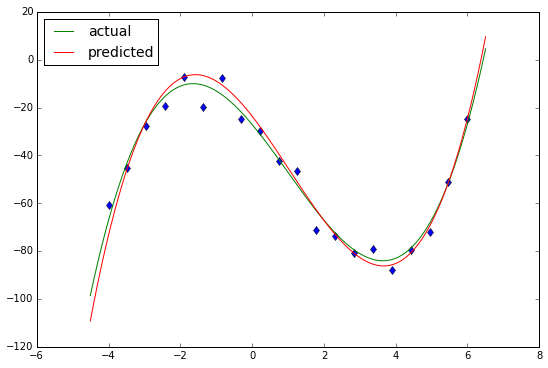

In [219]:
from matplotlib import pylab as plt
import sklearn.metrics
%matplotlib inline

np.random.seed(1)
X = np.linspace(-4, 6, 20).reshape(-1, 1)
def f(x):
    return x ** 3 - 3 * (x + 3) ** 2

y = f(X) + np.random.randn(*X.shape) * 4

X_test = np.linspace(-4.51, 6.51, 100).reshape(-1, 1)
y_actual = f(X_test)

svr = mySVR(kernel='polynomial', p=3, C=100)
svr.fit(X, y)
y_predicted = svr.predict(X_test)

print('Score: %.2f' % sklearn.metrics.mean_squared_error(y_predicted, y_actual))

plt.figure(figsize=(9, 6))
plt.plot(X, y, 'd')
plt.plot(X_test, y_actual, label='actual')
plt.plot(X_test, y_predicted, label='predicted')
plt.legend(loc='best', fontsize=14)
plt.show()

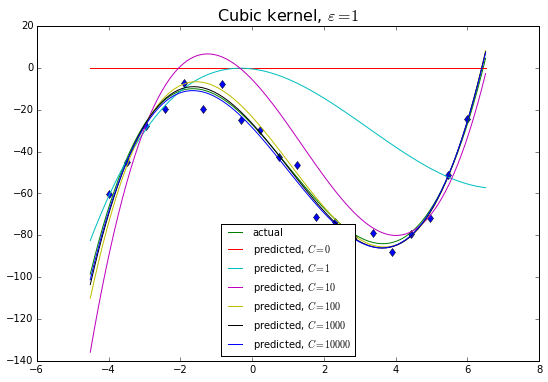

In [182]:
C = [0, 1, 10, 100, 1000, 10000]

plt.figure(figsize=(9, 6))
plt.title('Cubic kernel, $\\varepsilon=1$', size=16)
plt.plot(X, y, 'd')
plt.plot(X_test, y_actual, label='actual')

for c in C:
    svr = mySVR(kernel='polynomial', p=3, C=c, epsilon=1.)
    svr.fit(X, y)
    y_predicted = svr.predict(X_test)
    plt.plot(X_test, y_predicted, label='predicted, $C={:d}$'.format(c))

plt.legend(loc='best', fontsize=10)
plt.show()

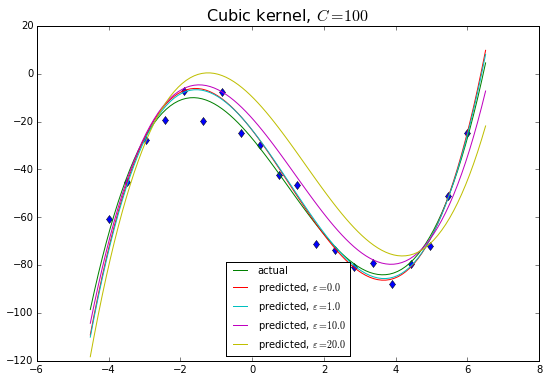

In [187]:
Epsilon = [0, 1, 10, 20]

plt.figure(figsize=(9, 6))
plt.title('Cubic kernel, $C=100$', size=16)
plt.plot(X, y, 'd')
plt.plot(X_test, y_actual, label='actual')

for epsilon in Epsilon:
    svr = mySVR(kernel='polynomial', p=3, C=100, epsilon=epsilon)
    svr.fit(X, y)
    y_predicted = svr.predict(X_test)
    plt.plot(X_test, y_predicted, label='predicted, $\\varepsilon={:.1f}$'.format(epsilon))

plt.legend(loc='best', fontsize=10)
plt.show()

One can see, the classifier is sensitive to tuning parameters and it can be easily overfitted.

In [193]:
print('Score: %.2f' % sklearn.metrics.mean_squared_error(y_predicted, y_actual))

Score: 10.29


In [220]:
from sklearn.grid_search import GridSearchCV

param_grid = {
    'C': [1e0, 1e1, 1e2, 1e3, 1e4, 1e5],
    'epsilon': [1e-2, 1e-1]
}

gs = GridSearchCV(mySVR(kernel='polynomial', p=3), param_grid, cv=10, scoring='mean_squared_error')
gs.fit(X, y)
gs.best_params_

{'C': 100000.0, 'epsilon': 0.01}

In [221]:
svr = mySVR(kernel='polynomial', p=3, **gs.best_params_)
svr.fit(X, y)
y_predicted = svr.predict(X_test)

print('Score: %.2f' % sklearn.metrics.mean_squared_error(y_predicted, y_actual))

Score: 2.33


One can see that prediction improved as long as mean squared error has dropped.

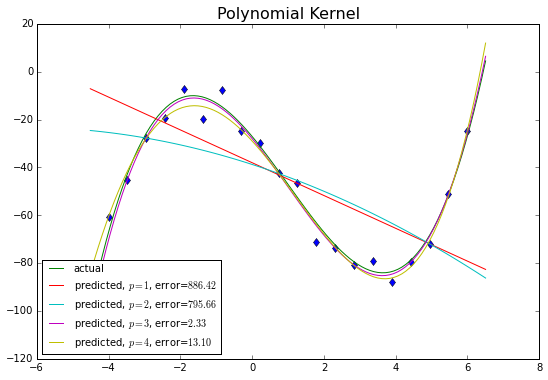

In [224]:
p_space = np.arange(1, 5)

plt.figure(figsize=(9, 6))
plt.title('Polynomial Kernel', size=16)
plt.plot(X, y, 'd')
plt.plot(X_test, y_actual, label='actual')

for p in p_space:
    svr = mySVR(kernel='polynomial', p=p, **gs.best_params_)
    y_predicted = svr.fit(X, y).predict(X_test)
    plt.plot(X_test, y_predicted, label='predicted, $p={:d}$, error=${:.2f}$'.format(
        p, sklearn.metrics.mean_squared_error(y_predicted, y_actual)
    ))

plt.legend(loc='best', fontsize=10)
plt.show()

The best choice of degree for polynomial kernel is $p=3$.

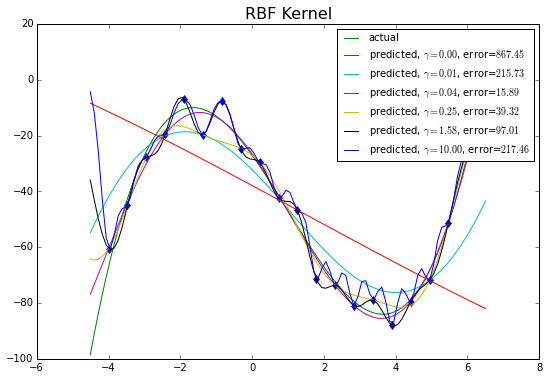

In [229]:
gamma_space = np.logspace(-3, 1, 6)

plt.figure(figsize=(9, 6))
plt.title('RBF Kernel', size=16)
plt.plot(X, y, 'd')
plt.plot(X_test, y_actual, label='actual')

for gamma in gamma_space:
    svr = mySVR(kernel='rbf', gamma=gamma, **gs.best_params_)
    y_predicted = svr.fit(X, y).predict(X_test)
    plt.plot(X_test, y_predicted, label='predicted, $\\gamma={:.2f}$, error=${:.2f}$'.format(
        gamma, sklearn.metrics.mean_squared_error(y_predicted, y_actual)
    ))

plt.legend(loc='best', fontsize=10)
plt.show()

Now we can see that the best fitting curve is purple, which corresponds bandwidth $\gamma=0.04$.